# Training a Proximal Policy Optimization RL algorithm using Ray RLlib

In [4]:
import os
from pathlib import Path

import gymnasium as gym
import matplotlib.pyplot as plt
from pprint import pprint
from ray import air, tune
from ray.rllib.algorithms.ppo import PPOConfig
from ray.rllib.algorithms.algorithm import Algorithm

os.environ["SDL_VIDEODRIVER"] = "dummy"
from IPython.display import clear_output

## Creating the PPO agent using the config API

In [5]:
config = PPOConfig().environment("CartPole-v1")

algo = config.build()

print("\n\nConfig info:\n")
pprint(config.to_dict())

/home/lasse/.local/share/virtualenvs/ray_minicourse-PTDOXG61/lib/python3.10/site-packages/ray/rllib/algorithms/algorithm.py:557: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  return UnifiedLogger(config, logdir, loggers=None)
/home/lasse/.local/share/virtualenvs/ray_minicourse-PTDOXG61/lib/python3.10/site-packages/ray/tune/logger/unified.py:53: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
The `JsonLogger interface is deprecated in favor of the `ray.tune.json.JsonLoggerCallback` interface and will be removed in Ray 2.7.
  self._loggers.append(cls(self.config, self.logdir, self.trial))
/home/lasse/.local/share/virtualenvs/ray_minicourse-PTDOXG61/lib/python3.10/

2024-11-24 22:16:18,274	INFO worker.py:1783 -- Started a local Ray instance.
2024-11-24 22:16:23,688	WARNING util.py:61 -- Install gputil for GPU system monitoring.




Config info:

{'_AlgorithmConfig__prior_exploration_config': None,
 '_disable_action_flattening': False,
 '_disable_execution_plan_api': -1,
 '_disable_initialize_loss_from_dummy_batch': False,
 '_disable_preprocessor_api': False,
 '_dont_auto_sync_env_runner_states': False,
 '_enable_rl_module_api': -1,
 '_env_to_module_connector': None,
 '_evaluation_parallel_to_training_wo_thread': False,
 '_fake_gpus': False,
 '_is_atari': None,
 '_learner_class': None,
 '_learner_connector': None,
 '_model_config_dict': {},
 '_module_to_env_connector': None,
 '_per_module_overrides': {},
 '_rl_module_spec': None,
 '_run_training_always_in_thread': False,
 '_tf_policy_handles_more_than_one_loss': False,
 'action_mask_key': 'action_mask',
 'action_space': None,
 'actions_in_input_normalized': False,
 'add_default_connectors_to_env_to_module_pipeline': True,
 'add_default_connectors_to_learner_pipeline': True,
 'add_default_connectors_to_module_to_env_pipeline': True,
 'algorithm_config_overrides_p

Below are some important aspects of our PPO RL config:

In [6]:
print(f"Neural network architecture: {config['model']['fcnet_hiddens']}")
print(f"Batch size: {config['train_batch_size']}")

Neural network architecture: [256, 256]
Batch size: 4000


## Training the created PPO agent

In [7]:
training_batches = 10  # Number of training iterations
rewards_per_iteration = []
for i in range(training_batches):
    result = (
        algo.train()
    )  # One logical iteration of training (not a step, but a batch of steps)
    result.pop("config")  # Removing config from result to decrease log size
    pprint(result)
    rewards_per_iteration.append(result["env_runners"]["episode_return_mean"])

save_result = algo.save()
checkpoint_dir = save_result.checkpoint.path
print(f"Checkpoint saved in directory {checkpoint_dir}")

2024-11-24 22:16:26,338	WARNING deprecation.py:50 -- DeprecationWarning: `ray.rllib.execution.train_ops.multi_gpu_train_one_step` has been deprecated. This will raise an error in the future!


{'agent_timesteps_total': 4000,
 'counters': {'num_agent_steps_sampled': 4000,
              'num_agent_steps_trained': 4000,
              'num_env_steps_sampled': 4000,
              'num_env_steps_trained': 4000},
 'custom_metrics': {},
 'date': '2024-11-24_22-16-32',
 'done': False,
 'env_runners': {'connector_metrics': {'ObsPreprocessorConnector_ms': np.float64(0.005192282312203453),
                                       'StateBufferConnector_ms': np.float64(0.003739551723939586),
                                       'ViewRequirementAgentConnector_ms': np.float64(0.0952800531037815)},
                 'custom_metrics': {},
                 'episode_len_mean': np.float64(20.649214659685864),
                 'episode_media': {},
                 'episode_return_max': 71.0,
                 'episode_return_mean': np.float64(20.649214659685864),
                 'episode_return_min': 9.0,
                 'episode_reward_max': 71.0,
                 'episode_reward_mean': np.float

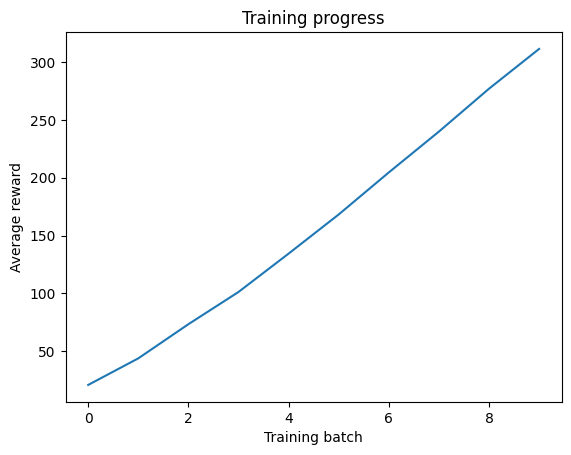

In [8]:
plt.figure()
plt.plot(rewards_per_iteration)
plt.xlabel("Training batch")
plt.ylabel("Average reward")
plt.title("Training progress")
plt.show()

## Reading the trained agent from checkpoint

We could use the trained `algo` variable to test the trained agent, but in case you stop the script and want to use the trained agent after, you need to read the model from an external file to save time.

In [9]:
print(f"The checkpoints were saved in: {checkpoint_dir}")
read_agent = Algorithm.from_checkpoint(checkpoint_dir)

2024-11-24 22:17:49,995	WARNING deprecation.py:50 -- DeprecationWarning: `_enable_new_api_stack` has been deprecated. Use `AlgorithmConfig._enable_new_api_stack` instead. This will raise an error in the future!


The checkpoints were saved in: /tmp/tmp3z3zxptn


/home/lasse/.local/share/virtualenvs/ray_minicourse-PTDOXG61/lib/python3.10/site-packages/ray/rllib/algorithms/algorithm.py:557: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  return UnifiedLogger(config, logdir, loggers=None)
/home/lasse/.local/share/virtualenvs/ray_minicourse-PTDOXG61/lib/python3.10/site-packages/ray/tune/logger/unified.py:53: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
The `JsonLogger interface is deprecated in favor of the `ray.tune.json.JsonLoggerCallback` interface and will be removed in Ray 2.7.
  self._loggers.append(cls(self.config, self.logdir, self.trial))
/home/lasse/.local/share/virtualenvs/ray_minicourse-PTDOXG61/lib/python3.10/

### Testing the read agent

In [12]:
env = gym.make(
    "CartPole-v1", render_mode="rgb_array"
)  # Recreating the environment to show the animation
number_of_episodes = 1  # Number of episodes to test

terminated = False
total_reward = 0
report_performance = []
for episode in range(number_of_episodes):
    obs, _ = env.reset()  # Initial observation
    terminated = False  # True when an episode has finished
    total_reward = 0
    number_steps_not_falling = 0
    while not terminated:
        action = read_agent.compute_single_action(  # Here we compute the action using the trained agent
            obs,
            explore=False,
        )
        obs, reward, terminated, truncated, info = env.step(
            action
        )  # Applying the action in the environment
        total_reward += float(reward)
        number_steps_not_falling += 1

        # Code to show the animation
        clear_output(wait=True)
        plt.imshow(env.render())
        plt.title(f"Episode {episode + 1}, step={number_steps_not_falling}")
        plt.show()
        # End - Code to show the animation
    report_performance.append((total_reward, number_steps_not_falling))
print("Performance report:")
for episode, (total_reward, number_steps_not_falling) in enumerate(report_performance):
    print(
        f"Episode {episode + 1}: reward={total_reward}, steps={number_steps_not_falling}"
    )

KeyboardInterrupt: 

## Learning a more elegant and complete way of training using Ray Tuner

In [13]:
config = PPOConfig().environment("CartPole-v1")
stop = {
    "training_iteration": 10,
}
checkpoint_frequency = 0
store_results_path = str(Path("./ray_results/").resolve()) + "/nb_2/"
agent_name = "ppo_cartpole"

tuner = tune.Tuner(
    "PPO",
    param_space=config.to_dict(),
    run_config=air.RunConfig(
        storage_path=store_results_path,
        name=agent_name,
        stop=stop,
        verbose=2,
        checkpoint_config=air.CheckpointConfig(
            checkpoint_frequency=checkpoint_frequency,
            checkpoint_at_end=True,
        ),
    ),
)
results = tuner.fit()
print(results)

2024-11-24 22:26:27,909	INFO tune.py:616 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949
/home/lasse/.local/share/virtualenvs/ray_minicourse-PTDOXG61/lib/python3.10/site-packages/gymnasium/spaces/box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/home/lasse/.local/share/virtualenvs/ray_minicourse-PTDOXG61/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:164: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/lasse/.local/share/virtualenvs/ray_minicourse-PTDOXG61/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:188: UserWarning: WARN: The obs returned by the `reset()` method is not within th

(PPO pid=200086) Install gputil for GPU system monitoring.
(PPO pid=200086) 2024-11-24 22:26:39,487	WARNING deprecation.py:50 -- DeprecationWarning: `ray.rllib.execution.train_ops.multi_gpu_train_one_step` has been deprecated. This will raise an error in the future!
(PPO pid=200086) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/home/lasse/ray_minicourse/lesson_1/ray_results/nb_2/ppo_cartpole/PPO_CartPole-v1_25a5e_00000_0_2024-11-24_22-26-27/checkpoint_000000)


Trial name,agent_timesteps_total,counters,custom_metrics,env_runners,episode_media,info,num_agent_steps_sampled,num_agent_steps_sampled_lifetime,num_agent_steps_trained,num_env_steps_sampled,num_env_steps_sampled_lifetime,num_env_steps_sampled_this_iter,num_env_steps_sampled_throughput_per_sec,num_env_steps_trained,num_env_steps_trained_this_iter,num_env_steps_trained_throughput_per_sec,num_healthy_workers,num_in_flight_async_sample_reqs,num_remote_worker_restarts,num_steps_trained_this_iter,perf,timers
PPO_CartPole-v1_25a5e_00000,40000,"{'num_env_steps_sampled': 40000, 'num_env_steps_trained': 40000, 'num_agent_steps_sampled': 40000, 'num_agent_steps_trained': 40000}",{},"{'episode_reward_max': 500.0, 'episode_reward_min': 62.0, 'episode_reward_mean': np.float64(267.33), 'episode_len_mean': np.float64(267.33), 'episode_media': {}, 'episodes_timesteps_total': 26733, 'policy_reward_min': {'default_policy': np.float64(62.0)}, 'policy_reward_max': {'default_policy': np.float64(500.0)}, 'policy_reward_mean': {'default_policy': np.float64(267.33)}, 'custom_metrics': {}, 'hist_stats': {'episode_reward': [91.0, 457.0, 211.0, 187.0, 167.0, 87.0, 322.0, 160.0, 203.0, 172.0, 79.0, 82.0, 178.0, 118.0, 62.0, 195.0, 176.0, 321.0, 320.0, 178.0, 298.0, 195.0, 204.0, 294.0, 217.0, 259.0, 259.0, 214.0, 269.0, 184.0, 235.0, 385.0, 265.0, 360.0, 206.0, 301.0, 295.0, 378.0, 339.0, 329.0, 236.0, 500.0, 214.0, 277.0, 132.0, 211.0, 214.0, 174.0, 238.0, 233.0, 288.0, 234.0, 284.0, 259.0, 377.0, 228.0, 278.0, 303.0, 283.0, 217.0, 356.0, 386.0, 409.0, 117.0, 138.0, 315.0, 363.0, 182.0, 242.0, 286.0, 107.0, 248.0, 199.0, 353.0, 302.0, 108.0, 234.0, 500.0, 372.0, 235.0, 358.0, 343.0, 309.0, 368.0, 241.0, 227.0, 375.0, 279.0, 279.0, 270.0, 359.0, 310.0, 323.0, 479.0, 500.0, 326.0, 465.0, 382.0, 293.0, 363.0], 'episode_lengths': [91, 457, 211, 187, 167, 87, 322, 160, 203, 172, 79, 82, 178, 118, 62, 195, 176, 321, 320, 178, 298, 195, 204, 294, 217, 259, 259, 214, 269, 184, 235, 385, 265, 360, 206, 301, 295, 378, 339, 329, 236, 500, 214, 277, 132, 211, 214, 174, 238, 233, 288, 234, 284, 259, 377, 228, 278, 303, 283, 217, 356, 386, 409, 117, 138, 315, 363, 182, 242, 286, 107, 248, 199, 353, 302, 108, 234, 500, 372, 235, 358, 343, 309, 368, 241, 227, 375, 279, 279, 270, 359, 310, 323, 479, 500, 326, 465, 382, 293, 363], 'policy_default_policy_reward': [91.0, 457.0, 211.0, 187.0, 167.0, 87.0, 322.0, 160.0, 203.0, 172.0, 79.0, 82.0, 178.0, 118.0, 62.0, 195.0, 176.0, 321.0, 320.0, 178.0, 298.0, 195.0, 204.0, 294.0, 217.0, 259.0, 259.0, 214.0, 269.0, 184.0, 235.0, 385.0, 265.0, 360.0, 206.0, 301.0, 295.0, 378.0, 339.0, 329.0, 236.0, 500.0, 214.0, 277.0, 132.0, 211.0, 214.0, 174.0, 238.0, 233.0, 288.0, 234.0, 284.0, 259.0, 377.0, 228.0, 278.0, 303.0, 283.0, 217.0, 356.0, 386.0, 409.0, 117.0, 138.0, 315.0, 363.0, 182.0, 242.0, 286.0, 107.0, 248.0, 199.0, 353.0, 302.0, 108.0, 234.0, 500.0, 372.0, 235.0, 358.0, 343.0, 309.0, 368.0, 241.0, 227.0, 375.0, 279.0, 279.0, 270.0, 359.0, 310.0, 323.0, 479.0, 500.0, 326.0, 465.0, 382.0, 293.0, 363.0]}, 'sampler_perf': {'mean_raw_obs_processing_ms': np.float64(0.2208380458446168), 'mean_inference_ms': np.float64(0.7785186233164333), 'mean_action_processing_ms': np.float64(0.08936344714224453), 'mean_env_wait_ms': np.float64(0.04502092652599139), 'mean_env_render_ms': np.float64(0.0)}, 'num_faulty_episodes': 0, 'connector_metrics': {'ObsPreprocessorConnector_ms': np.float64(0.004676103591918945), 'StateBufferConnector_ms': np.float64(0.003720998764038086), 'ViewRequirementAgentConnector_ms': np.float64(0.09334707260131836)}, 'num_episodes': 10, 'episode_return_max': 500.0, 'episode_return_min': 62.0, 'episode_return_mean': np.float64(267.33), 'episodes_this_iter': 10}",{},"{'learner': {'default_policy': {'learner_stats': {'allreduce_latency': np.float64(0.0), 'grad_gnorm': np.float32(0.6937569), 'cur_kl_coeff': np.float64(0.075), 'cur_lr': np.float64(5.0000000000000016e-05), 'total_loss': np.float64(9.801570382682225), 'policy_l

2024-11-24 22:28:27,217	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/home/lasse/ray_minicourse/lesson_1/ray_results/nb_2/ppo_cartpole' in 0.0118s.
2024-11-24 22:28:27,484	INFO tune.py:1041 -- Total run time: 119.58 seconds (119.27 seconds for the tuning loop).


ResultGrid<[
  Result(
    metrics={'custom_metrics': {}, 'episode_media': {}, 'info': {'learner': {'default_policy': {'learner_stats': {'allreduce_latency': np.float64(0.0), 'grad_gnorm': np.float32(0.6937569), 'cur_kl_coeff': np.float64(0.075), 'cur_lr': np.float64(5.0000000000000016e-05), 'total_loss': np.float64(9.801570382682225), 'policy_loss': np.float64(-0.021358875291401982), 'vf_loss': np.float64(9.822306110012915), 'vf_explained_var': np.float64(-0.16100084153554772), 'kl': np.float64(0.00830850572796564), 'entropy': np.float64(0.5370361144183784), 'entropy_coeff': np.float64(0.0)}, 'model': {}, 'custom_metrics': {}, 'num_agent_steps_trained': np.float64(128.0), 'num_grad_updates_lifetime': np.float64(8835.5), 'diff_num_grad_updates_vs_sampler_policy': np.float64(464.5)}}, 'num_env_steps_sampled': 40000, 'num_env_steps_trained': 40000, 'num_agent_steps_sampled': 40000, 'num_agent_steps_trained': 40000}, 'env_runners': {'episode_reward_max': 500.0, 'episode_reward_min': 62.0,

In [14]:
analysis = tune.ExperimentAnalysis(store_results_path + agent_name)
assert analysis.trials is not None, "Analysis trial is None"
checkpoint = analysis.get_last_checkpoint(analysis.trials[0])
tuner_agent = Algorithm.from_checkpoint(checkpoint)

/home/lasse/.local/share/virtualenvs/ray_minicourse-PTDOXG61/lib/python3.10/site-packages/ray/rllib/algorithms/algorithm.py:557: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  return UnifiedLogger(config, logdir, loggers=None)
/home/lasse/.local/share/virtualenvs/ray_minicourse-PTDOXG61/lib/python3.10/site-packages/ray/tune/logger/unified.py:53: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
The `JsonLogger interface is deprecated in favor of the `ray.tune.json.JsonLoggerCallback` interface and will be removed in Ray 2.7.
  self._loggers.append(cls(self.config, self.logdir, self.trial))
/home/lasse/.local/share/virtualenvs/ray_minicourse-PTDOXG61/lib/python3.10/

2024-11-24 22:29:23,280	WARNING util.py:61 -- Install gputil for GPU system monitoring.


### Test the agent trained using Tuner

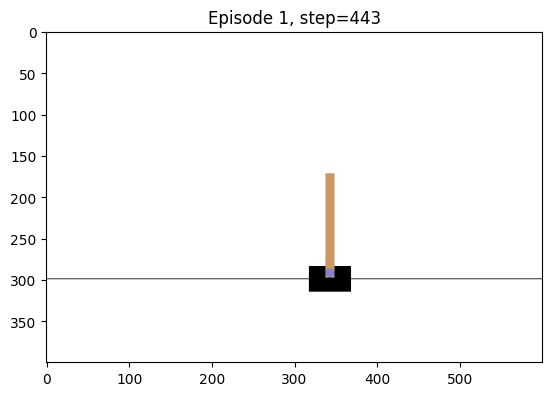

KeyboardInterrupt: 

In [15]:
env = gym.make(
    "CartPole-v1", render_mode="rgb_array"
)  # Recreating the environment to show the animation
number_of_episodes = 1  # Number of episodes to test

terminated = False
total_reward = 0
report_performance = []
for episode in range(number_of_episodes):
    obs, _ = env.reset()  # Initial observation
    terminated = False  # True when an episode has finished
    total_reward = 0
    number_steps_not_falling = 0
    while not terminated:
        action = tuner_agent.compute_single_action(  # Here we compute the action using the trained agent
            obs,
            explore=False,
        )
        obs, reward, terminated, truncated, info = env.step(
            action
        )  # Applying the action in the environment
        total_reward += float(reward)
        number_steps_not_falling += 1

        # Code to show the animation
        clear_output(wait=True)
        plt.imshow(env.render())
        plt.title(f"Episode {episode + 1}, step={number_steps_not_falling}")
        plt.show()
        # End - Code to show the animation
    report_performance.append((total_reward, number_steps_not_falling))
print("Performance report:")
for episode, (total_reward, number_steps_not_falling) in enumerate(report_performance):
    print(
        f"Episode {episode + 1}: reward={total_reward}, steps={number_steps_not_falling}"
    )